This is a kernel based on Zomato Ratings. I have tried to do a uni-variate analysis to understand which factors influence customers to give a certain rate to the restaurants.Is it location based? or are customers price sensitive?

Let us start answering questions as:-
 Which are the famous restaurants people like to dine in?
   - What is the rating they usually give?
   - What is the cost they are willing to pay?
   - What is the characteristics/nature of food that customers prefer to eat here?
   - Is Cost a factor when it comes to give rating to customers?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from wordcloud import WordCloud

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import pandas as pd
df = pd.read_csv('../input/zomato.csv')

['zomato.csv']


> 1. ![](http://)Here we get a basic idea on the data set wrt its columns and data present

In [2]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**By the data above, we understand rate is a dependant variable . Rate is given by customers based on factors like online_order options, booking a table option, dishes prepared, type of cuisine etc.**

2. We assess the number of columns and rows present. This data is useful incase we want to delete certain rows which contain null values

In [3]:
df.shape

(51717, 17)

> 3. Checking for NAs in the Data

In [4]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
#df = df.dropna(axis=0, subset=['rate'])
#df.isna()

4. Checking the rows whose ratings have NA as a value

In [6]:
df[df['rate'].isna()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,[],[],Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,NaN,South Indian,200,[],[],Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,NaN,0,+91 9591504624,Banashankari,"Takeaway, Delivery",NaN,Beverages,250,[],[],Delivery,Banashankari
113,https://www.zomato.com/bangalore/dharwad-line-...,"Shop 25, 1st Cross, 50 Feet Main Road, Near BD...",Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,+91 9901539269,Banashankari,Dessert Parlor,NaN,Mithai,150,[],[],Delivery,Banashankari
114,https://www.zomato.com/bangalore/cake-bite-ban...,"Near Seetha Circle, Vivekananda Park Road, Gir...",Cake Bite,No,No,NaN,0,+91 8277102303,Banashankari,Bakery,NaN,Bakery,300,"[('Rated 1.0', ""RATED\n worst service & only ...",[],Delivery,Banashankari
115,https://www.zomato.com/bangalore/aarushs-food-...,"41/10, Near PESIT Collage, 8th Main Road, 1st ...",Aarush's Food Plaza,No,No,NaN,0,+91 9008179916,Banashankari,Quick Bites,NaN,"North Indian, Street Food",200,[],[],Delivery,Banashankari
116,https://www.zomato.com/bangalore/wood-stove-ba...,"3148, 2nd Cross, 4th Phase Girinagar, Near Hos...",Wood Stove,No,No,NaN,0,+91 9845810938,Banashankari,"Takeaway, Delivery",NaN,South Indian,150,"[('Rated 5.0', 'RATED\n Wow this food is grea...",[],Delivery,Banashankari
117,https://www.zomato.com/bangalore/kulfi-more-ba...,"662, 19th Main, Kidney Foundation, Padmanabhan...",Kulfi & More,No,No,NaN,0,+91 9902901010,Banashankari,Dessert Parlor,NaN,"Ice Cream, Desserts, Juices",150,[],[],Delivery,Banashankari


**By this we conclude, we can delete rows who have ratings as "NA"**

In [7]:
#df['book_table'][df['rate'].isna()].value_counts()

5. Deleting rows which have "NA" 

In [8]:
df = df.dropna(axis=0, subset=['rate'])
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

6. If you would have observed, the ratings for all restaurants are made out of 5. Hence we can remove the '/5' from the rating

In [9]:
df.rate.astype(str,inplace=True)
df['rate'] = [x[:-2] for x in df['rate']]

In [10]:
#df['rate'].fillna("0/5",inplace=True)
df['dish_liked'].fillna("None",inplace=True)
df['cuisines'].fillna("None",inplace=True)
df['approx_cost(for two people)'].fillna("0.0",inplace=True)
df['rest_type'].fillna("None",inplace=True)
df['location'].fillna("None",inplace=True)

In [11]:
#df.isna().sum()

### Conversion to Numeric and Renaming

7. The observation from the data set is that Rate, Votes and Average Cost per 2 person should be numeric . They are right now represented as strings.

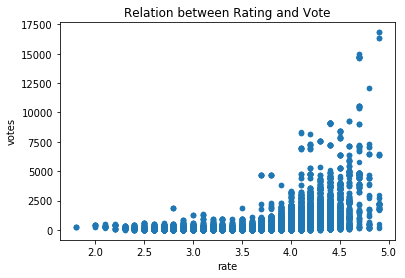

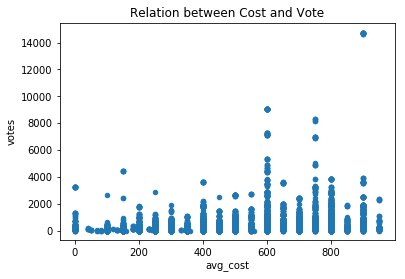

In [12]:
df['rate'] = pd.to_numeric(df['rate'],errors='coerce')
df['votes'] = pd.to_numeric(df['votes'],errors='coerce')
df.rename(columns={'approx_cost(for two people)': 'avg_cost'},inplace = True)
df.rename(columns={'listed_in(type)': 'type'},inplace = True)
df.rename(columns={'listed_in(city)': 'city'},inplace = True)
df['avg_cost'] = pd.to_numeric(df['avg_cost'],errors='coerce')
df.plot(x='rate',y='votes',kind='scatter',title='Relation between Rating and Vote')
df.plot(x='avg_cost',y='votes',kind='scatter',title='Relation between Cost and Vote')

In [13]:
df.isna().sum()

url                0
address            0
name               0
online_order       0
book_table         0
rate            2277
votes              0
phone            832
location           0
rest_type          0
dish_liked         0
cuisines           0
avg_cost        6798
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

In [14]:
df.drop(['url','address','reviews_list'],axis=1,inplace=True)

In [15]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,avg_cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


Now that we are done dealing with all the NAs. Let us focus more on bringing more sense from the data already present. If you see , every record in the table has a rating out of 5. Let us try removing the '/5' 

In [16]:
#df.drop(['production_companies','cast'],axis=1,inplace=True)
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df['rate'].dtype

dtype('float64')

In [18]:
df.type.value_counts()

Delivery              21828
Dine-out              14961
Desserts               2872
Cafes                  1604
Drinks & nightlife     1076
Buffet                  871
Pubs and bars           666
Name: type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58b67180f0>,
      dtype=object)

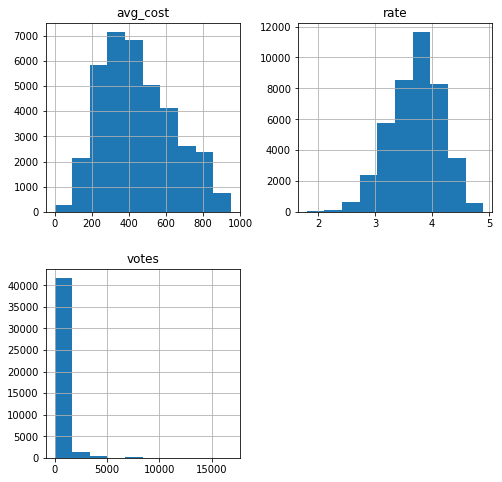

In [19]:
df.hist(figsize=(8,8))

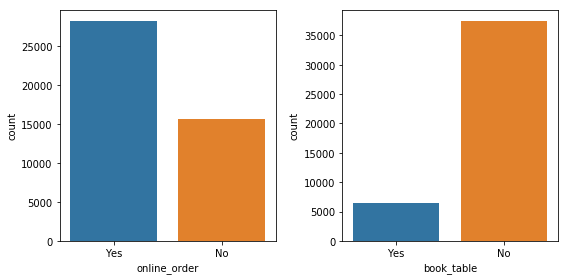

In [20]:
plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(df['online_order'])
plt.subplot(1,2,2)
sns.countplot(df['book_table'])
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]), <a list of 92 Text xticklabel objects>)

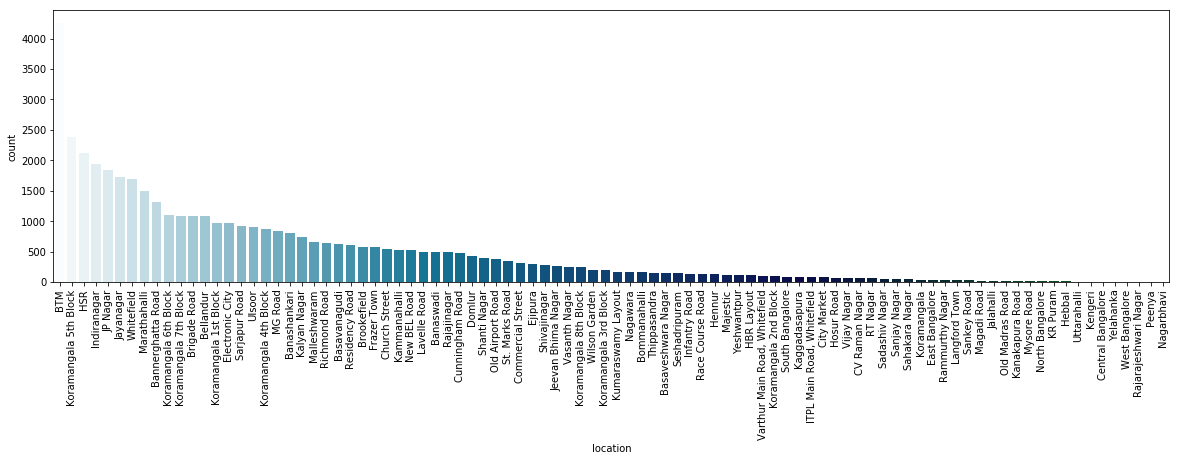

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(df['location'],palette='ocean_r',order=df['location'].value_counts().index)
plt.xticks(rotation=90)

In [22]:
"""
plt.figure(figsize=(15,5))
sns.distplot(df['avg_cost'])
plt.xticks(rotation=90)
sns.distplot(df['avg_cost'])
"""


"\nplt.figure(figsize=(15,5))\nsns.distplot(df['avg_cost'])\nplt.xticks(rotation=90)\nsns.distplot(df['avg_cost'])\n"

In [23]:
#df.rate.dtype

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

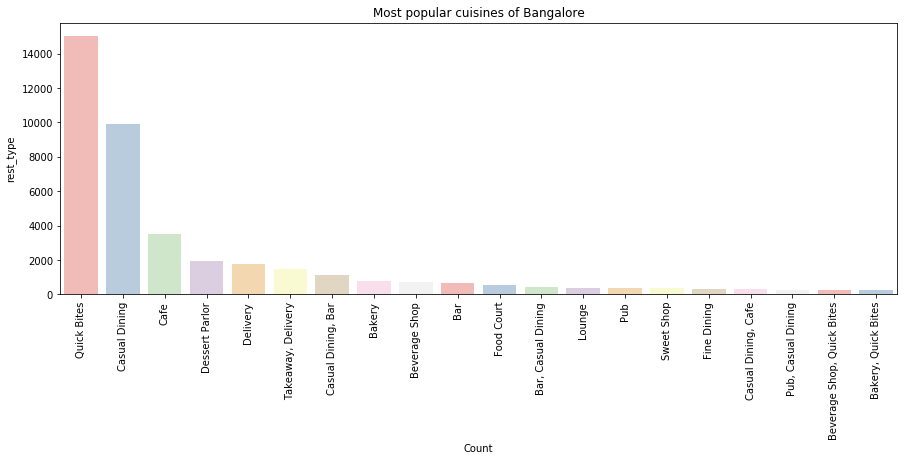

In [24]:
plt.figure(figsize=(15,5))
rest_type=df['rest_type'].value_counts()[:20]
sns.barplot(rest_type.index,rest_type,palette='Pastel1')
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.xticks(rotation=90)

Quick Bites and Casual Dining is mostly what customers usually prefer

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

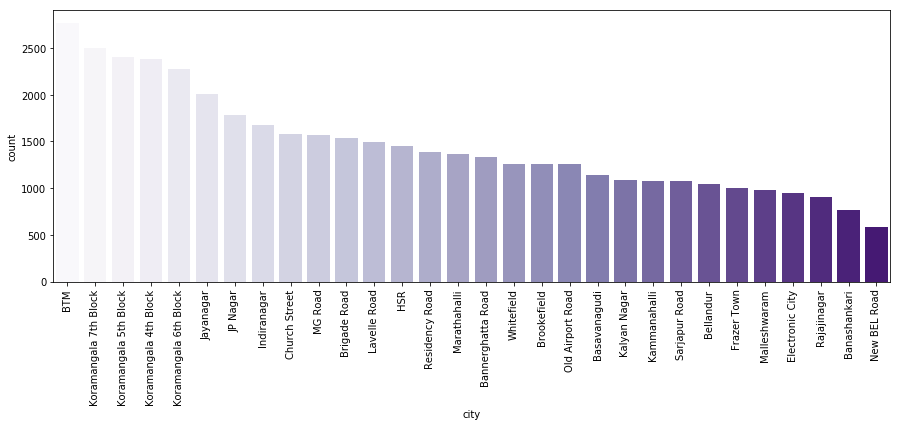

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(df['city'],palette='Purples',order = df['city'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

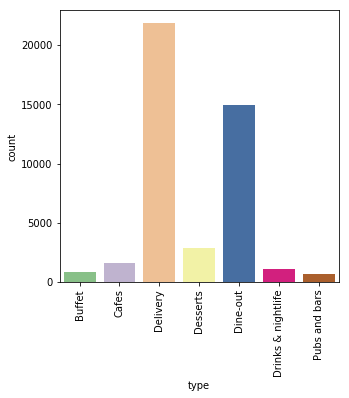

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(df['type'],palette='Accent')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

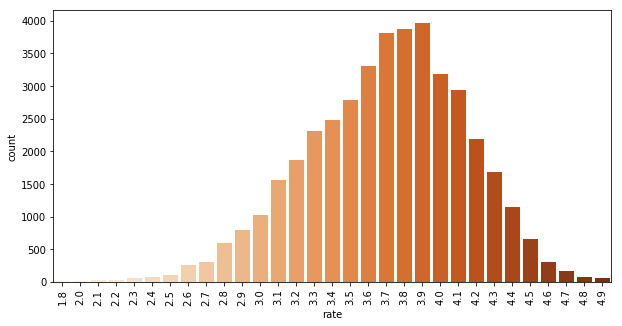

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(df['rate'],palette='Oranges')
plt.xticks(rotation=90)

Which are the most Popular cuisines of Bangalore?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

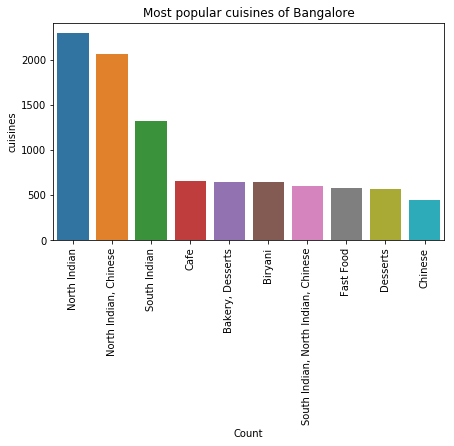

In [28]:
plt.figure(figsize=(7,4))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines.index,cuisines)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

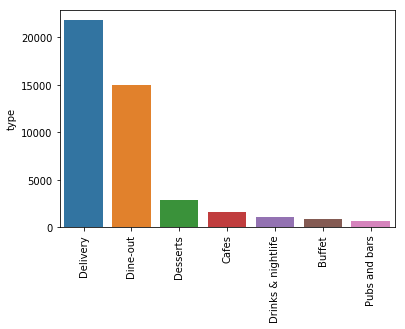

In [29]:
dish=df['type'].value_counts()[:15]
sns.barplot(dish.index,dish)
plt.xticks(rotation=90)

## Bivariate Analysis

__Average Rating given to Restaurants for Providing Booking Option__


Here we check what are the average ratings given to restaurants who provide the option of booking a table at their restaurant. It Looks like customers prefer restaurants who give the provision of booking a table

Text(0, 0.5, 'Average rating')

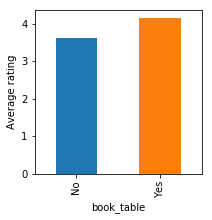

In [30]:
plt.figure(figsize=(3,3))
df.groupby('book_table')['rate'].mean().plot.bar()
plt.ylabel('Average rating')

**Average Rating given to Restaurants for Online Order Option**

Here we check what are the average ratings given to restaurants who provide the option of ordering food online. 

The difference is not much

Text(0, 0.5, 'Average rating')

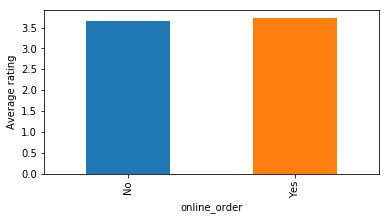

In [31]:
plt.figure(figsize=(6,3))
df.groupby('online_order')['rate'].mean().plot.bar()
plt.ylabel('Average rating')

In [32]:
#df.groupby('name')['rate'].mean()

In [33]:
#df.query('online_order=="Yes"').query('book_table=="Yes"')

What are the top 15 preferred eating places in Bangalore?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

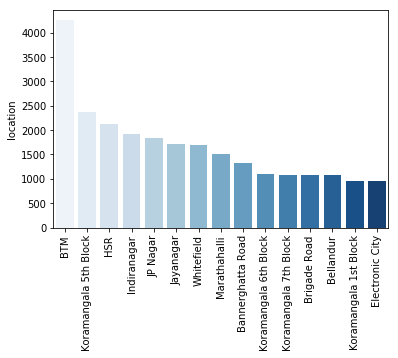

In [34]:
#plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:15]
sns.barplot(Rest_locations.index,Rest_locations,palette='Blues')
plt.xticks(rotation=90)

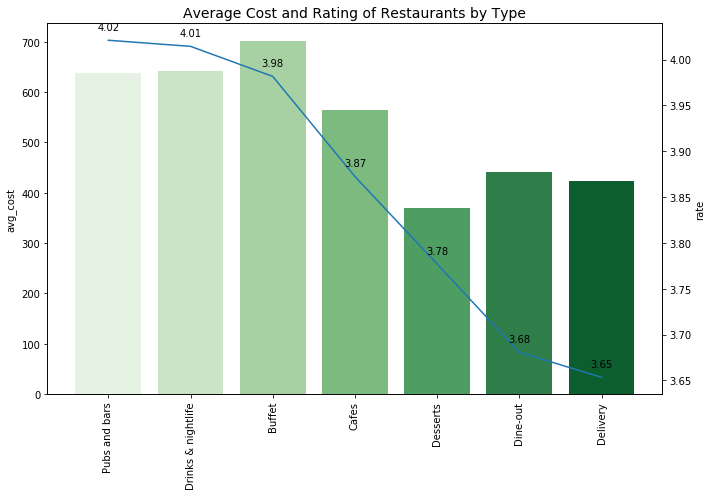

In [35]:
rest_params = df.groupby(by='type', as_index=False).mean().sort_values(by='rate',ascending=False)
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='type', y='avg_cost', data=rest_params, ax=ax,palette='Greens')
ax2 = ax.twinx()
sns.lineplot(x='type', y='rate', data=rest_params, ax=ax2, sort=False)
ax.tick_params(axis='x', labelrotation=90)
ax.xaxis.set_label_text("")

xs = np.arange(0,10,1)
ys = rest_params['rate']
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')
    
ax.set_title('Average Cost and Rating of Restaurants by Type', size=14)
plt.tight_layout()

In [36]:
"""
df['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
df['dish_liked'].value_counts()
#rest=df['rest_type'].value_counts()[:9].index
"""

"\ndf['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])\ndf['dish_liked'].value_counts()\n#rest=df['rest_type'].value_counts()[:9].index\n"

In [37]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=df[df['rest_type']==r]['dish_liked'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

## Multi-Variable Analysis ##

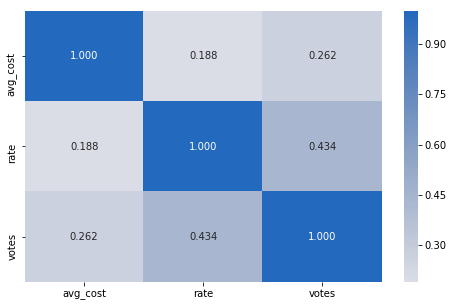

In [38]:
numeric_vars = ['avg_cost','rate','votes']
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

### Developing Wordcloud to see which are the favorite foods in each type of eating categories ###

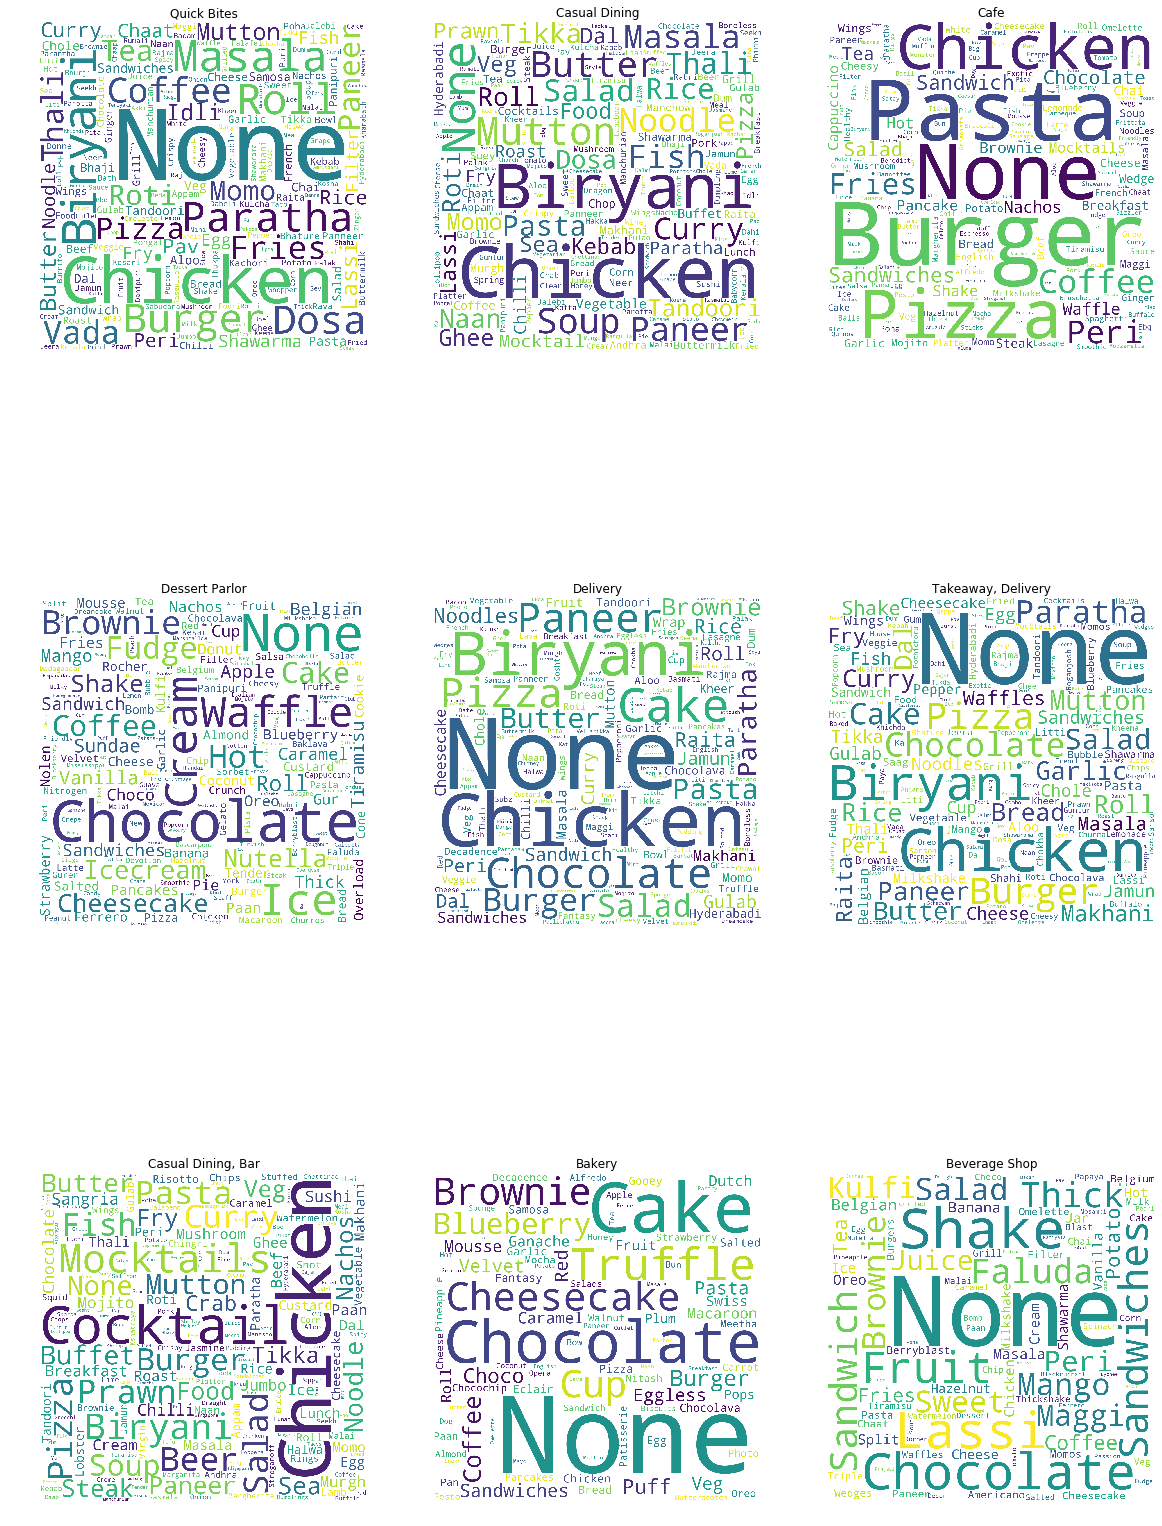

In [39]:
df['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
df['dish_liked']
rest=df['rest_type'].value_counts()[:9].index
rest
produce_wordcloud(rest) 

In [40]:
print(rest)

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop'],
      dtype='object')


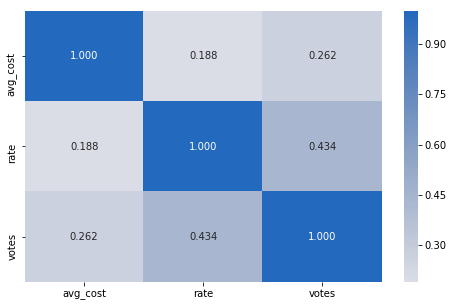

In [41]:
numeric_vars = ['avg_cost','rate','votes']
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()